In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from scipy.signal import savgol_filter
import matplotlib.animation as animation
import matplotlib.transforms as transforms
import matplotlib.gridspec as gridspec


# from reticuler.system import Box, Network, System
# from reticuler.extending_kernels import extenders, pde_solvers
# from reticuler.extending_kernels.pde_solvers import rotation_matrix
# from reticuler.user_interface import graphics, clippers

plt.rcParams.update({
    'figure.dpi': 150,

    'text.usetex': True,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,

    'axes.linewidth': 0.5,
    'axes.titlesize': 12,

    'lines.linewidth': 1,
    'lines.markersize': 1,
    'lines.marker':'None',
    'lines.solid_capstyle':'round',
    
    'font.family': 'serif',
    'font.serif': ['Computer Modern'] # ['Times New Roman']
    })
    # 'font.size': 20,
    # 'font.family': 'serif',
    # 'font.serif': ['Times New Roman']})
colours = plt.rcParams['axes.prop_cycle'].by_key()['color']
cm2inch = 1/2.54
golden = (1 + 5 ** 0.5) / 2

# Fig 2: 1D model

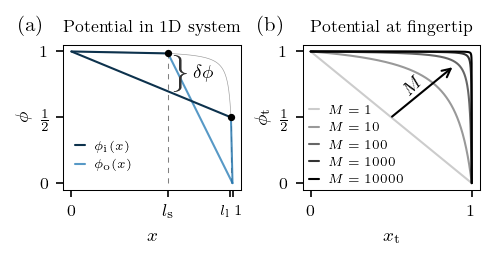

In [8]:
def phi1(x, M, L, p0, x_t):
    return p0 * (1 - x / ( M*L - x_t*(M - 1)) )
# return p0 - p0 * y / ( h_f*(1 - M) + M*H )
                 
def phi2(x, M, L, p0, x_t):
    return p0 * (L - x) / ( L - x_t*(1 - 1/M) )

def potential_plot(ax, M, H, p0, h_f, isLbl=False):
    y1 = np.linspace(0, h_f, 1000)
    y2 = np.linspace(h_f, H, 1000)
    if isLbl:
        ax.plot( y1, phi1(y1, M, H, p0, h_f), color='#0d324d', label='$\phi_\mathrm{i}(x)$')
        ax.plot( y2, phi2(y2, M, H, p0, h_f), color='tab:blue', alpha=0.75, label='$\phi_\mathrm{o}(x)$')
    else:
        ax.plot( y1, phi1(y1, M, H, p0, h_f), color='#0d324d')
        ax.plot( y2, phi2(y2, M, H, p0, h_f), color='tab:blue', alpha=0.75)
    ax.plot( y1[-1], phi1(y1[-1], M, H, p0, h_f), 'k.', ms=5 )
    
def fingertip_trajectory(ax, M, H, p0, **kwargs):
    y1 = np.linspace(0, H, 1000)
    ax.plot( y1, phi1(y1, M, H, p0, y1), **kwargs )

def x_stag(m):
    return (m)/(9+m)
def phi_stag(m):
    L = 1
    x = x_stag(m)
    return (L - x)/(L + x*(1/m - 1))
    
H = 1
M = 100
M2 = 10
p0 = 1
h0 = 0.6
h1 = (M)/(1+M) # x_stag(M) # x_stag(M) == 0.9900990099009901 # 0.975

a = 9.1
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(a*cm2inch,0.35*a*cm2inch))
fig.subplots_adjust(wspace=0.35)
for ax in axs:
    # ax.set_aspect(str(H/p0))
    ax.set_yticks([0, 1/2, 1])
    ax.set_yticklabels([0, r'$\frac{1}{2}$', '$1$'])    
    
axs[0].set_xticks([0, h0, h1-0.005, 1+0.005])
axs[0].set_xticklabels([0, '$l_\mathrm{s}$', '$ $','$ $'])
axs[0].annotate('$l_\mathrm{l}$', xy=(0.885, -0.17), xycoords='axes fraction', \
            fontfamily='Computer Modern', fontsize=7, color='0')
axs[0].annotate('$1$', xy=(0.97, -0.17), xycoords='axes fraction', \
            fontfamily='Computer Modern', fontsize=7, color='0')
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels([0, 1])
# axs[1].annotate('$1-d_\mathrm{i}(M)$', xy=(0.65, -0.145), xycoords='axes fraction', \
#             fontfamily='Computer Modern', fontsize=8, color='0')
# axs[1].annotate('$1$', xy=(0.95, -0.145), xycoords='axes fraction', \
#             fontfamily='Computer Modern', fontsize=8, color='0')

axs[0].set_ylabel('$\phi$', fontsize=9, labelpad=4)
axs[0].set_xlabel('$x$', fontsize=9)
axs[1].set_ylabel('$\phi_\mathrm{t}$', fontsize=9, labelpad=4)
axs[1].set_xlabel('$x_\mathrm{t}$', fontsize=9)

axs[0].set_title('Potential in 1D system', fontsize=8)
axs[1].set_title('Potential at fingertip', fontsize=8)

# SUBPLOT (a)
fingertip_trajectory(axs[0], M, H, p0, lw=0.3, color='0.6') # , label='$\phi_\mathrm{t}(x_\mathrm{t})$')
axs[0].vlines(h0, 0, 1, ls=(0, (5, 5)), color='0.5', lw=0.5)
axs[0].vlines(h1, 0, phi1(h1, M, H, p0, h1), ls=(0, (5, 5)), color='0.5', lw=0.5)
potential_plot(axs[0], M, H, p0, h0, isLbl=True)
potential_plot(axs[0], M, H, p0, h1)

# legends
axs[0].legend(loc='lower left', fontsize=6, frameon=False, handlelength=0.8, bbox_to_anchor=(-0.0, 0.05))

########### SUBPLOT (b) ###########
for aa, mm in zip(np.flip([1, 0.8, 0.6, 0.4, 0.2]), np.logspace(0, 4, 5)):
    fingertip_trajectory(axs[1], mm, H, p0, label='$M={:.0f}$'.format(mm), color='0', alpha=aa)
# axs[1].vlines(x_stag(M2), 0.25, phi_stag(M2), ls=(0, (5, 5)), color='0.5', lw=0.5)
# axs[1].hlines(0.9, 0, 1, ls=(0, (5, 5)),lw=0.5, color='0.6') # ls=(0, (10, 5)),
# axs[1].plot(x_stag(M2), phi_stag(M2),'.', color='tab:red', alpha=1, ms=3)
axs[1].legend(loc='lower left', fontsize=6, frameon=False, handlelength=0.8, bbox_to_anchor=(-0.025, -0.05))

# (a), (b)
axs[0].annotate('(a)', xy=(-0.25, 1.1), xycoords='axes fraction', \
            fontfamily='Computer Modern', fontsize=10, color='0') 
axs[1].annotate('(b)', xy=(-0.25, 1.1), xycoords='axes fraction', \
            fontfamily='Computer Modern', fontsize=10, color='0') 

# \delta p, buckle
axs[0].annotate('\}', xy=(0.62, 0.7425), xycoords='axes fraction', \
            fontfamily='Computer Modern', fontsize=18, color='0.2', fontweight='light')
axs[0].annotate('$\delta \phi$', xy=(0.73, 0.77), xycoords='axes fraction', \
            fontfamily='Computer Modern', fontsize=9, color='0') 

# arrow 
axs[1].annotate('', xy=(0.9, 0.9), xytext=(0.485, 0.485),
            arrowprops=dict(arrowstyle='->', color='0'))
axs[1].annotate('$M$', xy=(0.55, 0.65), xycoords='axes fraction', \
            fontfamily='Computer Modern', fontsize=9, color='0', rotation=45) 

# d_elbow
# axs[1].annotate('', xy=(1, -0.225), xycoords='axes fraction', xytext=(0.83, -0.225),
#             arrowprops=dict(arrowstyle='<->,head_length=0.15,head_width=.15', color='tab:red',lw=0.75, alpha=0.8))
# axs[1].annotate('$d_\mathrm{i}$', xy=(0.88, -0.325), xycoords='axes fraction', \
#             fontfamily='Computer Modern', fontsize=9, color='0') 
# axs[1].annotate('\}', xy=(0.87, -0.075), xycoords='axes fraction', \
#             fontfamily='Computer Modern', fontsize=8, color='tab:red', rotation=-90)
# axs[1].annotate('$d_\mathrm{i}$', xy=(0.88, -0.175), xycoords='axes fraction', \
#             fontfamily='Computer Modern', fontsize=9, color='0') 

fig.savefig('fig2.pdf', bbox_inches='tight', pad_inches=0)

# Fig 3: 2 fingers

In [2]:
import matplotlib
from scipy.interpolate import griddata, interp2d
            
def import_mesh(folder_name):
    points = np.loadtxt(folder_name+'results.points', skiprows=1, usecols=[0, 1])
    labels_points = np.loadtxt(folder_name+'results.points', skiprows=1, usecols=[3], dtype='int')
    triangles_id = np.loadtxt(folder_name+'results.faces', skiprows=1, usecols=[1,2,3], dtype='int')-1
    labels_triangles = np.loadtxt(folder_name+'results.faces', skiprows=1, usecols=[7], dtype='int')
    edges_id = np.loadtxt(folder_name+'results.edges', usecols=[0,1], dtype='int')
    labels_edges = np.loadtxt(folder_name+'results.edges', usecols=[2], dtype='int')
    return points, labels_points, triangles_id, edges_id, labels_edges, labels_triangles

def import_fields(folder_name, columns=0):
    field = np.loadtxt(folder_name+'results.fields', usecols=columns)
    return field

def prepare_streamlines(points, field, spacing=0.01):
    # Interpolate result on a regular grid
    xi = np.arange(points[:,0].min(), points[:,0].max() + spacing, spacing)
    yi = np.arange(points[:,1].min(), points[:,1].max() + spacing, spacing)
    X, Y = np.meshgrid( xi, yi)
    ui = griddata(points, field, (X, Y), 'cubic')
    # Calculate gradient
    [DY, DX] = np.gradient(-ui, spacing)
    return X, Y, DX, DY, ui

In [3]:
H = 1
W = 1/3
hLow = 0.3
hHigh = 0.9
xLow = W/3
xHigh = 2*W/3
fWidth = W/3/5

# base_name = "c:/Google/Research/Network simulations/reticuler_archive/2023Breakthrough/0static_calculations/"
# names = [base_name+'fig3/mr1000000_v5/', base_name+'fig3/mr100_v5/']
names = ['data/fig3/M1000000/', 'data/fig3/M100/']

def transform(pts):
    theta = np.radians(90)
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c, -s), (s, c)))
    
    rollX = xHigh + fWidth/2 + 0.001
    pts[pts[:,0]>rollX, 0] = pts[pts[:,0]>rollX, 0] - W
    pts[:,0] = pts[:,0] + W - rollX
    pts[:,0] = W-pts[:,0]
    pts = np.dot(pts, R.T)
    pts[:,0] = -pts[:,0]
    return pts

points = [1, 1]
points_0 = [0, 0]
labels_points = [1, 1]
triangles_id = [1, 1]
edges_id = [1, 1]
labels_edges = [1, 1]
labels_triangles = [1, 1]
field = [1, 1]
X = [1, 1]
Y = [1, 1]
DX = [1, 1]
DY = [1, 1]
U = [1, 1]
for i in range(2):
    folder_name = names[i]
    points[i], labels_points[i], triangles_id[i], edges_id[i], labels_edges[i], labels_triangles[i] = import_mesh(folder_name = folder_name)
    
    points_0[i] = np.copy(points[i])
    points[i] = transform(points[i])
    
    field[i] = import_fields(folder_name = folder_name, columns=0)
    X[i], Y[i], DX[i], DY[i], U[i] = prepare_streamlines(points[i], field[i], spacing=0.005)
    
tip_pos = lambda x, h, alpha0, alpha1, rr: np.array([x - rr*np.cos(np.linspace(alpha0, alpha1, 50)), h-fWidth/2 + rr*np.sin(np.linspace(alpha0, alpha1, 50))]).T
points_low = np.concatenate([ [[xLow-fWidth/2, 0]],
                            tip_pos(xLow, hLow, 0, np.pi, fWidth/2),
                            [[xLow+fWidth/2, 0]]
                        ])
points_high = np.concatenate([ [[xHigh-fWidth/2, 0]],
                            tip_pos(xHigh, hHigh, 0, np.pi, fWidth/2),
                            [[xHigh+fWidth/2, 0]]
                        ])

bottom =np.array([ [0,0], [0,W] ])
top = np.array([ [H,0], [H,W] ])

points_low = transform(points_low)
points_high = transform(points_high)
xLow1 = points_low[0,1]-fWidth/2
xHigh1 = points_high[0,1]-fWidth/2

In [4]:
import scipy.ndimage

U_1 = np.copy(U)
U_1[np.abs(U_1)>1] = 1

DX_1 = np.copy(DX)
DY_1 = np.copy(DY)
DX_1[np.abs(DX_1)<1e-7] = np.nan
DY_1[np.abs(DY_1)<1e-7] = np.nan

In [5]:
to_fill_low = np.split(points_low,2)
to_fill_low[1] = np.flip(to_fill_low[1],axis=0)
to_fill_high = np.split(points_high,2)
to_fill_high[1] = np.flip(to_fill_high[1],axis=0)

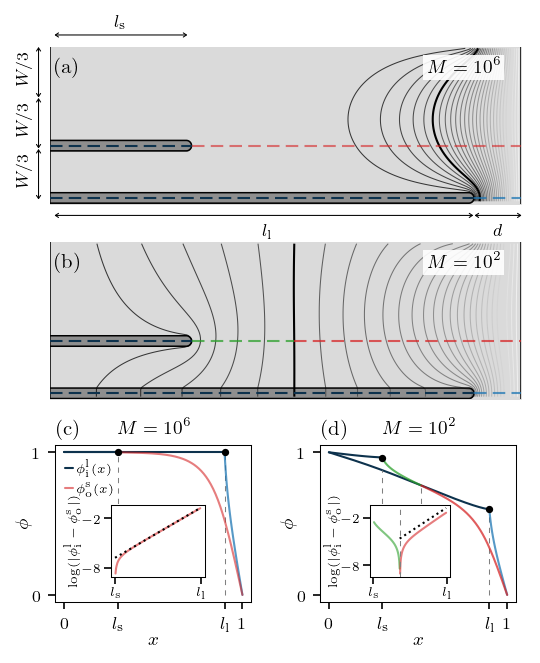

In [12]:
import matplotlib.gridspec as gridspec

a = 8.6*cm2inch*1.42
fig = plt.figure(figsize=(a, a))
gs = gridspec.GridSpec(ncols=2, nrows=5, \
                       height_ratios=[1,0.001,1,0.05,1.], \
                       hspace=0.2, wspace=-0.1)

# where is the flat contour line?
x_cut = lambda x: np.array([np.linspace(0, H, 300), \
                           x*np.ones(300)]).T 
i = 1
field_cut_low = griddata( points[i], field[i], x_cut(xLow1) )
field_cut_high = griddata( points[i], field[i], x_cut(xHigh1) )
tipIndHigh=np.argmin(abs(x_cut(xHigh1)[:,0]-hHigh))
tipIndLow=np.argmin(abs(x_cut(xLow1)[:,0]-hLow))
diff = field_cut_high[tipIndLow+1:tipIndHigh]-field_cut_low[tipIndLow+1:tipIndHigh]
indEqual = np.argmin(np.abs(diff))
xEqual = x_cut(xLow1)[tipIndLow+1+indEqual,0]
fieldEqual = field_cut_high[tipIndLow+1:tipIndHigh][indEqual]

lvls = np.concatenate( (np.linspace(0,fieldEqual,int(30*fieldEqual)+1), np.linspace(fieldEqual,1,int(30*(1-fieldEqual)+1))[1:]) )

########## CONTOUR PLOTS ##########
axs = [fig.add_subplot(gs[0, :]), fig.add_subplot(gs[2, :])]

norm = matplotlib.colors.BoundaryNorm(boundaries=lvls, ncolors=256)
colormap = 'binary'
for i in range(2):
    ax = axs[i]
    ax.contour(X[i], Y[i], U_1[i], levels=lvls[lvls!=fieldEqual], cmap=colormap, alpha=0.75, linewidths=0.5, norm=norm, extend='both')
    ax.contour(X[i], Y[i], U_1[i], levels=[fieldEqual], colors='0', linewidths=1, extend='both') # , linestyles='--'
    ax.plot(*points_low.T, color='0', linewidth=0.75);
    ax.plot(*points_high.T, color='0', linewidth=0.75);
    ax.plot(*top.T, color='0', linewidth=0.75);
    ax.plot(*bottom.T, color='0', linewidth=0.75);
    ax.fill_between([0, H], [0, 0], [W, W], color='#dadadaff')
    ax.fill_between(to_fill_low[0][:,0],to_fill_low[0][:,1],to_fill_low[1][:,1], color='#8e8e8eff',lw=0)
    ax.fill_between(to_fill_high[0][:,0],to_fill_high[0][:,1],to_fill_high[1][:,1], color='#8e8e8eff',lw=0)

# arrows
# width
xArrow = -0.025
xText = xArrow-0.05
axs[0].annotate('', xy=(xArrow, 0), xytext=(xArrow, 0.375), xycoords='axes fraction',
            arrowprops=dict(arrowstyle='<->,head_length=0.15,head_width=.1', color='0', lw=0.5))
axs[0].annotate('$W/3$', xy=(xText, 0.775), xycoords='axes fraction', \
            fontfamily='Computer Modern', fontsize=8, color='0', rotation=90)
axs[0].annotate('', xy=(xArrow, 0.325), xytext=(xArrow, 0.7), xycoords='axes fraction',
            arrowprops=dict(arrowstyle='<->,head_length=0.15,head_width=.1', color='0', lw=0.5))
axs[0].annotate('$W/3$', xy=(xText, 0.45), xycoords='axes fraction', \
            fontfamily='Computer Modern', fontsize=8, color='0', rotation=90)
axs[0].annotate('', xy=(xArrow, 0.65), xytext=(xArrow, 1.025), xycoords='axes fraction',
            arrowprops=dict(arrowstyle='<->,head_length=0.15,head_width=.1', color='0', lw=0.5))
axs[0].annotate('$W/3$', xy=(xText, 0.125), xycoords='axes fraction', \
            fontfamily='Computer Modern', fontsize=8, color='0', rotation=90)

# finger lenght
yArrow = -0.075
axs[0].annotate('', xy=(0, yArrow), xytext=(0.9075, yArrow), xycoords='axes fraction',
            arrowprops=dict(arrowstyle='<->,head_length=0.15,head_width=.1', color='0', lw=0.5))
axs[0].annotate('$l_\mathrm{l}$', xy=(0.45, -0.2), xycoords='axes fraction', \
            fontfamily='Computer Modern', fontsize=8, color='0')
axs[0].annotate('', xy=(0.8925, yArrow), xytext=(1.01, yArrow), xycoords='axes fraction',
            arrowprops=dict(arrowstyle='<->,head_length=0.15,head_width=.1', color='0', lw=0.5))
axs[0].annotate('$d$', xy=(0.94, -0.2), xycoords='axes fraction', \
            fontfamily='Computer Modern', fontsize=8, color='0')
axs[0].annotate('', xy=(0, 1-yArrow), xytext=(0.3, 1-yArrow), xycoords='axes fraction',
            arrowprops=dict(arrowstyle='<->,head_length=0.15,head_width=.1', color='0', lw=0.5))
axs[0].annotate('$l_\mathrm{s}$', xy=(0.135, 1.135), xycoords='axes fraction', \
            fontfamily='Computer Modern', fontsize=8, color='0')

# DASHED LINES ON 2D PLOTS
letters = ['(a)', '(b)']
titles = ['$M=10^6$','$M=10^2$']
for i, ax in enumerate(axs):
    ax.set_aspect('equal')
    ax.set_ylim(0, W)
    ax.set_xlim(0, H)
    ax.axis('off')
    if i==0:
        ax.axhline(xLow1, 0, to_fill_low[0][-1,0], ls=(0, (6, 3)), lw=1, color='#0d324d')
        # ax.axhline(xLow1, to_fill_low[0][-1,0], to_fill_high[0][-1,0], ls=(0, (6, 3)), lw=1, color='tab:red', alpha=0.6)
        ax.axhline(xLow1, to_fill_low[0][-1,0], 1, ls=(0, (6, 3)), lw=1, color='tab:red', alpha=0.6)
    else:
        ax.axhline(xLow1, 0, to_fill_low[0][-1,0], ls=(0, (6, 3)), lw=1, color='#0d324d')
        ax.axhline(xLow1, to_fill_low[0][-1,0], xEqual, ls=(0, (6, 3)), lw=1, color='tab:green', alpha=0.75)
        # ax.axhline(xLow1, xEqual, to_fill_high[0][-1,0], ls=(0, (6, 3)), lw=1, color='tab:red', alpha=0.75) 
        ax.axhline(xLow1, xEqual, 1, ls=(0, (6, 3)), lw=1, color='tab:red', alpha=0.75) 
        
    # ax.axhline(xHigh1, color='0', ls=(0, (6, 3)),lw=1, alpha=0.75)
    ax.axhline(xHigh1, 0, to_fill_high[0][-1,0], ls=(0, (6, 3)), lw=1, color='#0d324d')
    ax.axhline(xHigh1, to_fill_high[0][-1,0], 1, ls=(0, (6, 3)),lw=1, color='tab:blue', alpha=0.75)
    ax.annotate(letters[i], xy=(0.01, 0.84), xycoords='axes fraction', \
                fontfamily='Computer Modern', fontsize=10, color='0')
    ax.annotate(titles[i], xy=(0.8, 0.84), xycoords='axes fraction', \
                fontfamily='Computer Modern', fontsize=9, color='0', \
                bbox=dict(facecolor='1', edgecolor='none', alpha=0.9,  pad=2 ))

########## CUTS ALONG FINGERS ##########
axs = [fig.add_subplot(gs[4, 0]), fig.add_subplot(gs[4, 1])]
letters = ['(c)', '(d)']
for i in range(2):
    ax = axs[i]
    ax.set_aspect(H/1.25)
    if i==0 or i==1:
        ax.set_xticks([0, hLow, hHigh, H])
        ax.set_xticklabels([0, '$l_\mathrm{s}$', '$l_\mathrm{l}$', 1])
    ax.set_yticks([0, 1])
    ax.set_yticklabels([0, '$1$'])
    ax.set_ylabel('$\phi$', fontsize=9, labelpad=0)
    ax.set_xlabel('$x$', fontsize=9, labelpad=0)
    ax.set_title(titles[i], fontsize=9)
    ax.annotate(letters[i], xy=(0.01, 1.075), xycoords='axes fraction', \
            fontfamily='Computer Modern', fontsize=10, color='0')
    
    # interpolation
    field_cut_low = griddata(points[i], field[i], x_cut(xLow1) )
    field_cut_high = griddata(points[i], field[i], x_cut(xHigh1) )
    
    # HIGH FINGER
    ax.vlines(hHigh, 0, field_cut_high[tipIndHigh], ls=(0, (5, 5)), color='0.5', lw=0.5)
    if i ==0:
        ax.plot( x_cut(xHigh1)[:tipIndHigh,0], field_cut_high[:tipIndHigh], color='#0d324d')
        ax.plot( x_cut(xHigh1)[tipIndHigh:,0], field_cut_high[tipIndHigh:], color='tab:blue', alpha=0.75)
    else:
        ax.plot( x_cut(xHigh1)[:tipIndHigh,0], field_cut_high[:tipIndHigh], color='#0d324d', label='$\phi_\mathrm{i}(x)$')
        ax.plot( x_cut(xHigh1)[tipIndHigh:,0], field_cut_high[tipIndHigh:], color='tab:blue', alpha=0.75, label='$\phi_\mathrm{o}(x)$')        
    ax.plot( hHigh, field_cut_high[tipIndHigh], 'k.', ms=5 )

    # LOW FINGER
    ax.vlines(hLow, 0.2, field_cut_high[tipIndLow], ls=(0, (5, 5)), color='0.5', lw=0.5)
    ax.plot( x_cut(xLow1)[:tipIndLow,0], field_cut_low[:tipIndLow], color='#0d324d', label='$\phi_\mathrm{i}^\mathrm{l}(x)$')
    if i==0:
        ax.plot( x_cut(xLow1)[tipIndLow:,0], field_cut_low[tipIndLow:], color='tab:red', alpha=0.6, label='$\phi_\mathrm{o}^\mathrm{s}(x)$')
    else:
        ax.plot( x_cut(xLow1)[tipIndLow:tipIndLow+1+indEqual,0], field_cut_low[tipIndLow:tipIndLow+1+indEqual], color='tab:green', alpha=0.75)
        ax.plot( x_cut(xLow1)[tipIndLow+1+indEqual:,0], field_cut_low[tipIndLow+1+indEqual:], color='tab:red', alpha=0.75)
        ax.vlines(xEqual, 0.2, fieldEqual, ls=(0, (5, 5)), color='0.5', lw=0.5)
    # ax.plot( x_cut(xLow1)[tipIndHigh:,0], field_cut_low[tipIndHigh:], color='tab:blue', alpha=0.75) 
    ax.plot( hLow, field_cut_low[tipIndLow], 'k.', ms=5 )
    
#  0.95    
axs[0].legend(loc='upper right', bbox_to_anchor=(0.36, 0.98), \
              fontsize=6, frameon=False, handlelength=0.6,handletextpad=0.3) # , bbox_to_anchor=(-0.0, -0.0))

########## SCREENING INSET I ##########
ax = plt.axes([0.27, 0.145, 0.13, 0.1])
# ax.invert_yaxis()
# interpolation
i = 0
field_cut_low = griddata( points[i], field[i], x_cut(xLow1) )
field_cut_high = griddata( points[i], field[i], x_cut(xHigh1) )
diff = field_cut_high[tipIndLow+1:tipIndHigh]-field_cut_low[tipIndLow+1:tipIndHigh]

tipIndLow=np.argmin(abs(x_cut(xLow1)[:,0]-hLow))
indOffset = 30
tipIndHigh=np.argmin(abs(x_cut(xLow1)[:,0]-hHigh))
fit = np.polyfit(x_cut(xLow1)[tipIndLow+1+indOffset:tipIndHigh,0], \
                 np.log(field_cut_high[tipIndLow+1+indOffset:tipIndHigh]-field_cut_low[tipIndLow+1+indOffset:tipIndHigh]), 1)

ax.plot(x_cut(xLow1)[tipIndLow+1:tipIndHigh,0], \
        np.log(diff), color='tab:red', alpha=0.6)
ax.plot(x_cut(xLow1)[tipIndLow:tipIndHigh,0], \
        x_cut(xLow1)[tipIndLow:tipIndHigh,0]*fit[0]+fit[1], 'k', ls=':', lw=1) 

ax.set_xticks([hLow, hHigh])
ax.set_xticklabels(['$l_\mathrm{s}$', '$l_\mathrm{l}$'])
ax.set_yticks([-2, -8])
# ax.set_ylim(top=-9.5)
ax.tick_params(labelsize=6, pad=1)
# ax.set_ylabel('$| \phi_\mathrm{i}^\mathrm{l}-\phi_\mathrm{o}^\mathrm{s} |$ \n (log)', fontsize=6, labelpad=-6.5)
ax.set_ylabel('$\log(| \phi_\mathrm{i}^\mathrm{l}-\phi_\mathrm{o}^\mathrm{s} |)$', fontsize=6, labelpad=0)

########## SCREENING INSET II ##########
ax = plt.axes([0.63, 0.145, 0.11, 0.1])
# ax.invert_yaxis()

# interpolation
i = 1
field_cut_low = griddata( points[i], field[i], x_cut(xLow1) )
field_cut_high = griddata( points[i], field[i], x_cut(xHigh1) )
diff = field_cut_high[tipIndLow+1:tipIndHigh]-field_cut_low[tipIndLow+1:tipIndHigh]

a = np.log(np.abs(diff[indEqual-1]))
b = x_cut(xLow1)[tipIndLow+indEqual,0]*fit[0]+fit[1]

ax.plot(x_cut(xLow1)[tipIndLow+1:tipIndLow+1+indEqual,0], \
        np.log(np.abs(diff[:indEqual])), color='tab:green', alpha=0.6)
ax.plot(x_cut(xLow1)[tipIndLow+1+indEqual:tipIndHigh,0], \
        np.log(np.abs(diff[indEqual:])), color='tab:red', alpha=0.6)

ax.axvline(x_cut(xLow1)[tipIndLow+1+indEqual,0], ls=(0, (5, 5)), color='0.5', lw=0.5)

ax.plot(x_cut(xLow1)[tipIndLow+indEqual:tipIndHigh,0], \
        x_cut(xLow1)[tipIndLow+indEqual:tipIndHigh,0]*fit[0]+fit[1], 'k', ls=':', lw=1) 
 
ax.set_xticks([hLow, hHigh]) # xEqual
ax.set_xticklabels(['$l_\mathrm{s}$', '$l_\mathrm{l}$']) # '$l_\mathrm{eq}$',
ax.set_yticks([-2, -8])
# ax.set_xscale('log')
ax.tick_params(labelsize=6, pad=1)
# ax.set_ylabel('$| \phi_\mathrm{i}^\mathrm{l}-\phi_\mathrm{o}^\mathrm{s} |$ \n (log)', fontsize=6, labelpad=-6)
ax.set_ylabel('$\log(| \phi_\mathrm{i}^\mathrm{l}-\phi_\mathrm{o}^\mathrm{s} |)$', fontsize=6, labelpad=0)

fig.savefig('data/fig3/fig3_0.pdf', bbox_inches='tight', pad_inches=0)

# Fig 4: revival + attraction-repulsion maps

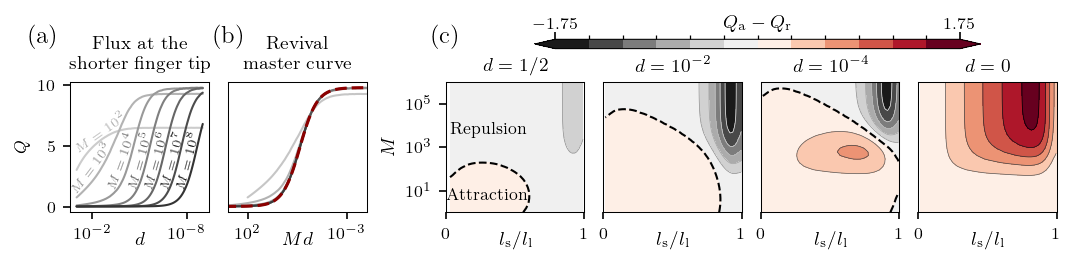

In [3]:
import scipy.ndimage
from scipy.optimize import curve_fit

a = 17.8 / 2.51 * 1.1965
fig = plt.figure(figsize=(a, a/7.5))
gs = gridspec.GridSpec(ncols=7, nrows=1, \
                       width_ratios=[1,1,.3,1,1,1,1], \
                       wspace=0.15)
axs = [fig.add_subplot(g) for g in gs]
axs[2].set_axis_off()
########## Maps ##########
nSteps = 50
H = 10
W = H/3
xLow = W/3
xHigh = 2*W/3
fWidth = W/15

colormap = 'RdGy_r'
colormap_colors = matplotlib.colormaps.get_cmap('binary') # cividis

# base_name = "c:/Google/Research/Network simulations/reticuler_archive/2023Breakthrough/0static_calculations/"
# folder_name = base_name+"fig4/maps/all_results/"
folder_name = 'data/fig4/'

nSteps = 50
# lvls = np.linspace(-0.06, 0.06, 13) * 10 / (np.pi*fWidth/2)
lvls = np.linspace(-1.75, 1.75, 13)
norm = matplotlib.colors.BoundaryNorm(boundaries=lvls, ncolors=256)
axes = axs[3:]

names = ['results_d0.5.fluxes', 'results_d0.01.fluxes','results_d0.0001.fluxes', 'results_d0.fluxes']
letters = ['(a)', '(b)', '(c)', '(d)']
titles = ['$d=1/2$', '$d=10^{-2}$', '$d=10^{-4}$', '$d=0$']
heights = [10*(1-5e-1), 10*(1-1e-2), 10*(1-1e-4), 10]
for i in range(4):
    file_name = names[i]
    hLow = np.loadtxt(folder_name+file_name, usecols=0).reshape(nSteps,nSteps)
    hHigh = heights[i]
    mobility = np.loadtxt(folder_name+file_name, usecols=1).reshape(nSteps,nSteps)
    qleft = np.loadtxt(folder_name+file_name, usecols=2).reshape(nSteps,nSteps) * 10 / (np.pi*fWidth/2)
    qright = np.loadtxt(folder_name+file_name, usecols=3).reshape(nSteps,nSteps) * 10 / (np.pi*fWidth/2)
    attraction = (qright-qleft) # / (qright+qleft)
    attraction = scipy.ndimage.gaussian_filter(attraction, sigma=2, order=0)

    ax = axes[i]
    ax.set_yscale('log')

    cf = ax.contourf(hLow[0]/hHigh, mobility[:,0], attraction, cmap=colormap, levels=lvls, norm=norm, extend='both')
    ax.contour(hLow[0]/hHigh, mobility[:,0], attraction, linewidths=0.35, cmap='binary', levels=lvls[np.logical_and(lvls!=0, lvls!=-0.16) ], norm=norm)
    ax.contour(hLow[0]/hHigh, mobility[:,0], attraction, linestyles='--', colors='0', levels=[0], norm=norm)

    # ax.set_xticks([0, 0.5, 1 ])
    # ax.set_xticklabels(['$0$', '$1/2$','$1$' ])
    ax.set_xticks([0, 1 ])
    ax.set_xticklabels(['$0$', '$1$' ])
    if i==0:
        ax.set_yticks([1e1, 1e3, 1e5])
    else:
        ax.get_yaxis().set_visible(False)
        # ax.get_xaxis().set_visible(False)
    # ax.set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1' ])
    ax.set_xlim(right=1)
    ax.set_ylim(top=1e6)
    ax.set_xlabel(r'$l_\mathrm{s}/l_\mathrm{l}$ ', fontsize=9, labelpad=-5) # labelpad=3)
    ax.set_ylabel(r'$M$', fontsize=9)

    ax.tick_params(axis='both', which='major') # , labelsize=9)
    # ax.annotate(letters[i], xy=(-0.2, 1.1), xycoords='axes fraction', \
    #                 fontfamily='Computer Modern', fontsize=12, color='0') #, bbox=dict(facecolor='1', edgecolor='0'))
    ax.set_title(titles[i], fontsize=9, pad=5)
    # ax.plot([0.33], [1e3], ms=3, marker='x', color='k')

###################### Colorbar ######################    
cax = plt.axes([0.49, 1.075, 0.35, 0.055])
cbar = fig.colorbar(cf, cax=cax, orientation='horizontal')
cbar.ax.set_xticks([-1.75,1.75])
# cbar.ax.set_xticklabels(['$-1.5$','$1.5$'], fontsize=8)
cbar.ax.tick_params(axis='both', which='major', pad=0) # , labelsize=9)
cbar.set_label(r'$Q_\mathrm{a} - Q_\mathrm{r}$', fontsize=9, labelpad=-5) # labelpad=7.5
cax.xaxis.set_ticks_position('top')
cax.xaxis.set_label_position('top')

# 0.825
axes[0].annotate('Repulsion', xy=(0.03, 0.6), xycoords='axes fraction', \
            fontfamily='Computer Modern', fontsize=8, color='0') #, bbox=dict(facecolor='1', edgecolor='0'))
axes[0].annotate('Attraction', xy=(0.005, 0.1), xycoords='axes fraction', \
            fontfamily='Computer Modern', fontsize=8, color='0') #, bbox=dict(facecolor='1', edgecolor='none', alpha=0.5, boxstyle='Round,pad=0.1'))
axes[0].annotate('(c)', xy=(-0.1, 1.3), xycoords='axes fraction', \
                fontfamily='Computer Modern', fontsize=12, color='0') # xy=(-0.2, 1.1)

###################### Revival ######################
colormap_colors = matplotlib.colormaps.get_cmap('binary') # cividis

file_name = 'data/fig5/results.fluxes' # originally 'fig4/finger_revival/results_2.fluxes'
nSteps_d = 100
nSteps_M = 10

dArr = np.loadtxt(file_name, usecols=0).reshape(nSteps_d,nSteps_M).T
mobility = np.loadtxt(file_name, usecols=1).reshape(nSteps_d,nSteps_M).T
left_flux = np.loadtxt(file_name, usecols=2).reshape(nSteps_d,nSteps_M).T * 10 / (np.pi*fWidth/2)
right_flux = np.loadtxt(file_name, usecols=3).reshape(nSteps_d,nSteps_M).T * 10 / (np.pi*fWidth/2)
total_flux = left_flux + right_flux

axes = axs[0:2]
for ax in axes:
    ax.invert_xaxis()
    ax.set_xscale('log')

ax = axes[0]
for i in range(2, nSteps_M-1):
    # ax.plot(dArr[i,:-1], total_flux[i,:-1]/total_flux[-1,0],label=str(mobility[i][0]), color=colormap_colors(i/nSteps_M))# str(1-i/nSteps_M))
    ax.plot(dArr[i,:-1], total_flux[i,:-1], color=colormap_colors(i/nSteps_M))# str(1-i/nSteps_M)) # label=str(mobility[i][0]),

# ax.set_yticks([0, 0.1, 0.2, 0.3])
# ax.set_yticklabels([0, 0.1, 0.2, 0.3])
ax.set_xticks([1e-2, 1e-8]) #  1e-5,
# ax.set_ylabel(r'$Q_\mathrm{a} + Q_\mathrm{r}$', fontsize=8) # _\mathrm{tot}
ax.set_ylabel(r'$Q$', fontsize=8) # _\mathrm{tot}
ax.set_xlabel(r'$d$', fontsize=9, labelpad=-5)
ax.set_title('Flux at the\nshorter finger tip', fontsize=9)

ax.annotate('$M=10^2$', xy=(0.02, 0.46), rotation=35, xycoords='axes fraction', \
                fontfamily='Computer Modern', fontsize=6, color=colormap_colors(3/nSteps_M)) # xy=(0.02, 0.46)
ax.annotate('$M=10^3$', xy=(-.005, 0.15), rotation=53, xycoords='axes fraction', \
                fontfamily='Computer Modern', fontsize=6, color=colormap_colors(4/nSteps_M)) # xy=(0.04, 0.19),
ax.annotate('$M=10^4$', xy=(0.26, 0.185), rotation=70, xycoords='axes fraction', \
                fontfamily='Computer Modern', fontsize=6, color=colormap_colors(5/nSteps_M)) # xy=(0.27, 0.21)
ax.annotate('$M=10^5$', xy=(0.405, 0.19), rotation=74, xycoords='axes fraction', \
                fontfamily='Computer Modern', fontsize=6, color=colormap_colors(6/nSteps_M)) # xy=(0.425, 0.23)
ax.annotate('$M=10^6$', xy=(0.52, 0.19), rotation=74, xycoords='axes fraction', \
                fontfamily='Computer Modern', fontsize=6, color=colormap_colors(7/nSteps_M)) # xy=(0.545, 0.23)
ax.annotate('$M=10^7$', xy=(0.635, 0.19), rotation=74, xycoords='axes fraction', \
                fontfamily='Computer Modern', fontsize=6, color=colormap_colors(8/nSteps_M)) # xy=(0.655, 0.23)
ax.annotate('$M=10^8$', xy=(0.75, 0.19), rotation=75, xycoords='axes fraction', \
                fontfamily='Computer Modern', fontsize=6, color=colormap_colors(9/nSteps_M)) # xy=(0.77, 0.23)
# ax.annotate('(a)', xy=(0.05, 0.86), xycoords='axes fraction', \
#                 fontfamily='Computer Modern', fontsize=12, color='0') # xy=(-0.2, 1.1)
ax.annotate('(a)', xy=(-0.3, 1.3), xycoords='axes fraction', \
                fontfamily='Computer Modern', fontsize=12, color='0') # xy=(-0.2, 1.1)

####### Master curve ##########
def resistor(d, f0, f1, d0):
    return f0 + (f1-f0)/(1 + d/d0)
ax = axes[1]
ax.annotate('(b)', xy=(-0.1, 1.3), xycoords='axes fraction', \
                fontfamily='Computer Modern', fontsize=12, color='0') # xy=(-0.2, 1.1)
ax.get_yaxis().set_visible(False)
ax.set_xlim(1e3, 1e-4)
ax.set_xticks([1e2, 1e-3]) # 1e0,
ax.set_xlabel(r'$Md$', fontsize=9, labelpad=-5)
ax.set_title('Revival\nmaster curve', fontsize=9)

for i in range(3, nSteps_M-2):
    ax.plot(dArr[i,:-1]*mobility[i,-1], total_flux[i,:-1],
            alpha=0.75, color=colormap_colors(i/nSteps_M),)
i = nSteps_M-2
ax.plot(dArr[i,:-1]*mobility[i,-1], total_flux[i,:-1],
        alpha=0.75, color=colormap_colors(i/nSteps_M),) # label='Simulations')
    
        
i=8
xdata = dArr[i,:-1]*mobility[i,-1]
ydata =  total_flux[i,:-1]
popt, pcov = curve_fit(resistor, xdata, ydata)

x_arr = np.logspace(4, -4, 100)
ax.plot(x_arr, resistor(x_arr, *popt),
        ls='--',c='darkred', lw=1.5, label='Master\ncurve') # r'$f_0 + \frac{f_1}{1+d_\mathrm{M}/d_\mathrm{c}}$')

# ax.legend(alignment='left',
#           loc='upper left', bbox_to_anchor=(-0.05, 1.05),
#           fontsize=6, frameon=False, handlelength=2,) # title="$M$", 

fig.savefig('fig4.pdf', bbox_inches='tight', pad_inches=0)

In [4]:
popt

array([0.0483574 , 9.76380913, 0.22754058])

# Fig 5: velocity

In [2]:
from reticuler.system import Box, Network, System
from reticuler.extending_kernels import extenders, pde_solvers
from reticuler.user_interface import graphics

## Plot

[0, 73, 631, 939, 1235]


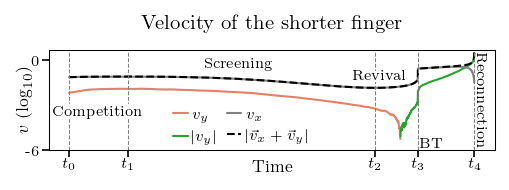

In [14]:
###################### Velocity plot ######################
colormap_colors = matplotlib.colormaps.get_cmap('RdGy_r')
archive_name = 'data/fig5/'

M = 1000
input_file = archive_name + 'M{M}'.format(M=M) # 'seeds1/seed2'
# Import System from JSON file
system = System.import_json(input_file=input_file)
network = system.network

drs = network.branches[0].points[2:-1]-network.branches[0].points[1:-2]
vels = drs / np.diff(system.timestamps)[:len(drs),np.newaxis]
vel_tot = np.linalg.norm(vels, axis=1)

drs2 = network.branches[1].points[2:-1]-network.branches[1].points[1:-2]
vels2 = drs2 / np.diff(system.timestamps)[:len(drs2),np.newaxis]
vel_tot2 = np.linalg.norm(vels2, axis=1)

d = np.zeros_like(vel_tot)
d[:len(network.branches[1].points)-3] = \
    ((10-system.extender.pde_solver.finger_width/2) - \
        network.branches[1].points[1:-2,1] ) / 10

############## PLOTS ##############
a = 0.5 * 8.6 / 2.51 * 1.0175 # without tip velocity axis
fig, ax = plt.subplots(figsize=(2.2*a, 0.5*a))

w = savgol_filter(vels[:,0], 31, 3)
ax.plot(system.timestamps[:sum(w<0)], np.abs(w)[:sum(w<0)], color=colormap_colors(0.75))
ax.plot(system.timestamps[sum(w<0):len(vels)], np.abs(w)[sum(w<0):], color="tab:green")
ax.plot(system.timestamps[:len(vels)], np.abs(vels[:,1]), color='0.5') # /vel_tot[:,np.newaxis])
ax.plot(system.timestamps[:len(vels)], vel_tot, '--', color='0') # /vel_tot[:,np.newaxis])

ax.legend(['$v_y$', '$|v_y|$',\
           '$v_x$', \
           '$|\\vec{v}_x + \\vec{v}_y|$'], \
              loc='lower left', bbox_to_anchor=(0.25, -0.075), \
                  frameon=False, handlelength=1, handletextpad=0.3, fontsize=7, \
                  ncols=2, columnspacing=0.5)
ax.set_yscale('log')
ax.set_ylim(1e-6,5e0)
ax.set_ylabel('$v \ (\log_{10})$', labelpad=-3)
ax.set_yticks([1e-6, 1e-0], [-6, 0])
ax.tick_params(axis='x', which='major', pad=0)
ax.tick_params(axis='y', which='major', pad=1)   

############## VLINES ##############
t_inds = [0, 73, 631, network.branches[1].steps[-1], len(system.timestamps)-1]
# t_labels = ['$t_{}$', '$t_{}$', '$t_{}$', '$t_{}$', '$t_{}$']
for i, i_t in enumerate(t_inds):
    t = system.timestamps[i_t]
    ax.axvline(t, ls='--', lw=0.5, color='0.5')

ax.set_xticks([system.timestamps[i_t] for i_t in t_inds],
                ['$t_{}$'.format(i) for i in range(len(t_inds))])
    
############## ANNOTATIONS ##############
ax.annotate('Competition', xy=(0.01, 0.35), xycoords='axes fraction', \
            fontfamily='Computer Modern', fontsize=7, color='0',\
            bbox=dict(fc="w",ec="w",pad=0))
ax.annotate('Screening', xy=(0.35, 0.825), xycoords='axes fraction', \
            fontfamily='Computer Modern', fontsize=7, color='0')
ax.annotate('Revival', xy=(0.68, 0.7), xycoords='axes fraction', \
            fontfamily='Computer Modern', fontsize=7, color='0',
           bbox=dict(fc="w",ec="w",pad=-1))
ax.annotate('BT', xy=(0.83, 0.03), xycoords='axes fraction', \
            fontfamily='Computer Modern', fontsize=7, color='0',
             bbox=dict(fc="w",ec="w",pad=-5))
ax.annotate('Reconnection', xy=(0.955, 0.05), xycoords='axes fraction', \
            fontfamily='Computer Modern', fontsize=7, color='0',
           bbox=dict(fc="w",ec="w",pad=-5), rotation=-90)

ax.set_xlabel('Time', labelpad=-5)
ax.set_title('Velocity of the shorter finger', fontsize=10, pad=10)

fig.align_ylabels()
fig.savefig('data/fig5/fig5_plot.pdf', bbox_inches='tight')

print(t_inds)

### Acceleration

73


631

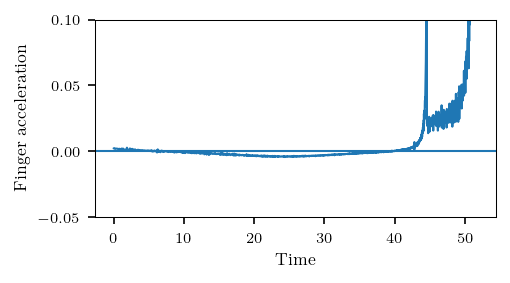

In [30]:
a = 8.6 / 2.51 /2 
fig, ax = plt.subplots(figsize=(2.01*a, 1*a))

ax.plot(system.timestamps[:len(vels)-1], np.diff(vel_tot)/np.diff(system.timestamps[:len(vels)]))
ax.set_ylim(-0.05,0.1)
ax.axhline(0)
ax.set_ylabel('Finger acceleration')
ax.set_xlabel('Time')
print(sum( (np.diff(vel_tot)/np.diff(system.timestamps[:len(vels)]))[:300] > 0))
print(sum( (np.diff(vel_tot)/np.diff(system.timestamps[:len(vels)])) < 0)+75)

## Snapshots

In [110]:
archive_name = 'data/fig5/'

M = 1000
input_file = archive_name + 'M{M}'.format(M=M)
t_inds = [0, 73, 631, 939, 1235]
xlim = [2.5, 2.5, 7.5, 10, 10]

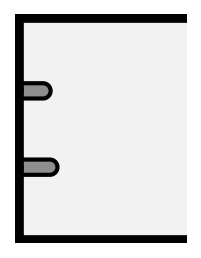

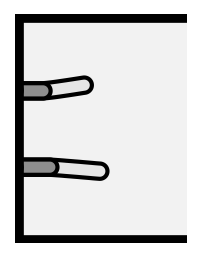

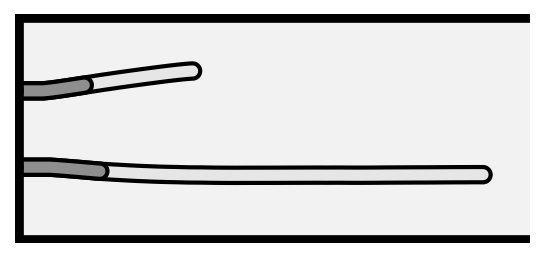

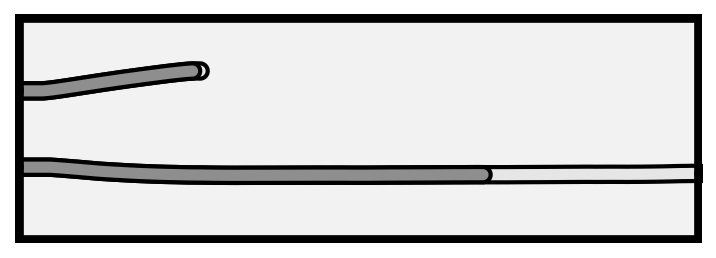

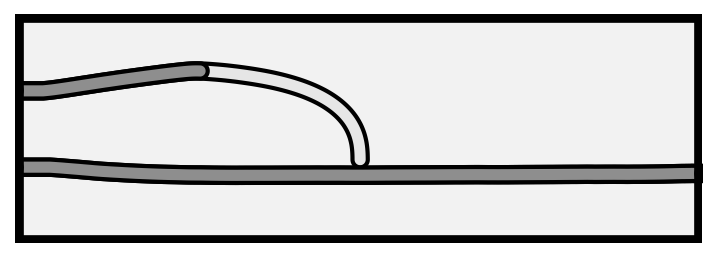

In [111]:
from reticuler.extending_kernels.pde_solvers import rotation_matrix
from reticuler.user_interface import clippers
from shapely.geometry import MultiLineString,Polygon
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.collections import PatchCollection

def plot_polygon(ax, poly, **kwargs):
    """Plot shapely Polygon (or MultiPolygon)"""
    collections = []
    polygons = [poly] if poly.geom_type=="Polygon" else poly.geoms
    for i, poly in enumerate(polygons):
        path = Path.make_compound_path(
            Path(np.asarray(poly.exterior.coords)[:, :2]),
            *[Path(np.asarray(ring.coords)[:, :2]) for ring in poly.interiors])
    
        patch = PathPatch(path) # , **kwargs)
        collections.append(PatchCollection([patch], **kwargs))
        
        ax.add_collection(collections[-1], autolim=True)
        ax.autoscale_view()
    
    return collections

def plot_thick_tree(system, color):
    # PLOT LINES
    pts = [] # list with regularized points (skeleton)
    for branch in system.network.branches:
        line = branch.points
        pts.append(branch.points)

    # thicken tree and find intersection with the box
    tree = MultiLineString(pts)
    thick_tree = tree.buffer(distance=system.extender.pde_solver.finger_width/2, 
                             cap_style=1, join_style=1, resolution=99)
    thick_tree = box.intersection(thick_tree)

    plot_polygon(ax, thick_tree, transform=rot+base, 
                 edgecolor="0", facecolor=color, linewidth=options_tree_plot["linewidth"])    
    

system0=System.import_json(input_file=input_file)
is_thick=1

options_tree_plot = {"color": "0.5", "linewidth": 2}
rot_angle = 90 
rot = transforms.Affine2D().rotate_deg(-rot_angle)
for i in range(len(t_inds)): # np.linspace(0, max_time, int(200/speed_factor)):
    fig = plt.figure(frameon=False)
    ax = plt.Axes(fig, [0., 0., 0.953, 0.318])
    fig.add_axes(ax)
    base = ax.transData

    # PLOT BOX
    box = Polygon(system.network.box.points)
    plot_polygon(ax, box,
                 facecolor="#f2f2f2ff" if is_thick else "#def1ff",
                 transform=rot+base)
    
    if i > 0:
        system = system0.copy()
        clippers.clip_to_step(system, t_inds[i])
        plot_thick_tree(system, color="0.9")
        
        system = system0.copy()
        clippers.clip_to_step(system, t_inds[i-1])
        plot_thick_tree(system, color="#8e8e8eff")
            
    else:
        system = system0.copy()
        clippers.clip_to_step(system, t_inds[i])    
        plot_thick_tree(system, color="#8e8e8eff")
        
    # PLOT BOX
    points_to_plot = system0.network.box.points[system0.network.box.connections]
    for pts in points_to_plot:
        ax.plot(*pts.T, linewidth=options_tree_plot["linewidth"] * 4, color="0", transform=rot+base)  
    
    ax.set_xlim(0, xlim[i])
    ax.set_ylim(-3.3333333, 0)
    ax.axis("off")
    ax.set_aspect("equal")    
    fig.savefig("data/fig5/frame{}.svg".format(i))

# Fig 6: experiments reproduction

## Simulations

### Plots

[807, 1208, 0]
[807, 1022, 0, 109]


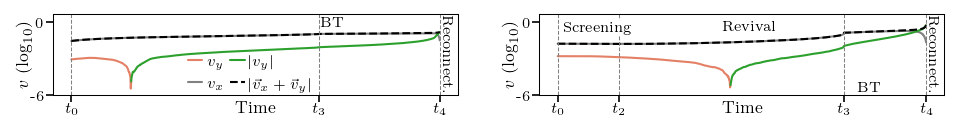

In [103]:
a = 0.5 * 8.6 / 2.51 * 1.0175 # without tip velocity axis
fig, axes = plt.subplots(ncols=2, figsize=(2*2.2*a, 0.4*a))
fig.subplots_adjust(hspace=0.6)

##################################################################
###################### Velocity plot 1 ######################
##################################################################
colormap_colors = matplotlib.colormaps.get_cmap('RdGy_r')
archive_name = 'data/fig6/'
Ms = [14.32, 100]

velos = []
timos = []
for i in range(2):
    M = Ms[i]
    ax = axes[i]
    
    ###################### Import ######################
    input_file = archive_name + 'M{M}'.format(M=M) # 'mobility_ratio{M}'.format(M=M)
    # Import System from JSON file
    system = System.import_json(input_file=input_file)
    network = system.network

    drs = network.branches[0].points[2:-1]-network.branches[0].points[1:-2]
    vels = drs / np.diff(system.timestamps)[:len(drs),np.newaxis]
    vel_tot = np.linalg.norm(vels, axis=1)
    velos.append(vel_tot)
    timos.append(system.timestamps[:len(vels)])
    
    ############## PLOTS ##############
    w = savgol_filter(vels[:,0], 41, 2) # vels[:,0] # 
    ax.plot(system.timestamps[:sum(w<0)+1], np.abs(w)[:sum(w<0)+1], color=colormap_colors(0.75))
    ax.plot(system.timestamps[:len(vels)], np.abs(vels[:,1]), color='0.5') # /vel_tot[:,np.newaxis])
    ax.plot(system.timestamps[sum(w<0):len(vels)], np.abs(w)[sum(w<0):], color="tab:green")
    ax.plot(system.timestamps[:len(vels)], vel_tot, '--', color='0') # /vel_tot[:,np.newaxis])

    ax.set_yscale('log')
    ax.set_ylim(1e-6,5e0)
    ax.set_ylabel('$v \ (\log_{10})$', labelpad=-1)
    ax.set_yticks([1e-6, 1e-0], [-6, 0])
    ax.set_xlabel('Time', labelpad=-7)

    # ############## VLINES ##############
    t_legends = ['$t_3$','$t_4$','$t_0$','$t_2$', '$t_1$']
    if i==0:
        t_inds = [network.branches[1].steps[-1], len(system.timestamps)-1,0]
    else:
        t_inds = [network.branches[1].steps[-1], len(system.timestamps)-1, 0, 109]
    print(t_inds)
    for j, j_t in enumerate(t_inds):
        t = system.timestamps[j_t]
        ax.axvline(t, ls='--', lw=0.5, color='0.5')
    ax.set_xticks([system.timestamps[i_t] for i_t in t_inds],
                [t_legends[i] for i in range(len(t_inds))])
    ax.tick_params(axis='x', which='major', pad=0)
    ax.tick_params(axis='y', which='major', pad=1)
    
    
    ax.annotate('Reconnect.', xy=(0.955, 0.05), xycoords='axes fraction', \
            fontfamily='Computer Modern', fontsize=7, color='0',
           bbox=dict(fc="w",ec="w",pad=-5), rotation=-90)

############## ANNOTATIONS ##############
axes[0].legend(['$v_y$', '$v_x$', \
           '$|v_y|$',\
           '$|\\vec{v}_x + \\vec{v}_y|$'], \
              loc='lower left', bbox_to_anchor=(0.3, -0.125), \
                  frameon=False, handlelength=1, handletextpad=0.3, fontsize=7, \
                  ncols=2, columnspacing=0.5) # bbox_to_anchor=(0.57, -0.1), for axes[1]
axes[1].annotate('BT', xy=(0.785, 0.04), xycoords='axes fraction', \
            fontfamily='Computer Modern', fontsize=7, color='0',
             bbox=dict(fc="w",ec="w",pad=-5))
axes[1].annotate('Screening', xy=(0.06, 0.79), xycoords='axes fraction', \
            fontfamily='Computer Modern', fontsize=7, color='0',
                bbox=dict(fc="w",ec="w",pad=0))
axes[1].annotate('Revival', xy=(0.45, 0.8), xycoords='axes fraction', \
            fontfamily='Computer Modern', fontsize=7, color='0',
           bbox=dict(fc="w",ec="w",pad=-5))

axes[0].annotate('BT', xy=(0.66, 0.85), xycoords='axes fraction', \
            fontfamily='Computer Modern', fontsize=7, color='0',
             bbox=dict(fc="w",ec="w",pad=-5))

fig.align_ylabels()
fig.savefig('data/fig6/fig6_plots_sim.pdf', bbox_inches='tight')

[807, 1208, 0]
[807, 1022, 0, 109]


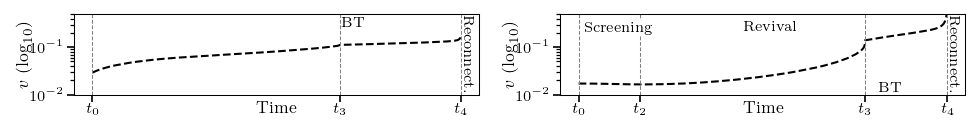

In [323]:
a = 0.5 * 8.6 / 2.51 * 1.0175 # without tip velocity axis
fig, axes = plt.subplots(ncols=2, figsize=(2*2.2*a, 0.4*a))
fig.subplots_adjust(hspace=0.6)

##################################################################
###################### Velocity plot 1 ######################
##################################################################
colormap_colors = matplotlib.colormaps.get_cmap('RdGy_r')
archive_name = 'data/fig6/'
Ms = [14.32, 100]

velos = []
timos = []
for i in range(2):
    M = Ms[i]
    ax = axes[i]
    
    ###################### Import ######################
    input_file = archive_name + 'M{M}'.format(M=M) # 'mobility_ratio{M}'.format(M=M)
    # Import System from JSON file
    system = System.import_json(input_file=input_file)
    network = system.network

    drs = network.branches[0].points[2:-1]-network.branches[0].points[1:-2]
    vels = drs / np.diff(system.timestamps)[:len(drs),np.newaxis]
    vel_tot = np.linalg.norm(vels, axis=1)
    velos.append(vel_tot)
    timos.append(system.timestamps[:len(vels)])
    
    ############## PLOTS ##############
    w = savgol_filter(vels[:,0], 41, 2) # vels[:,0] # 
    # ax.plot(system.timestamps[:sum(w<0)+1], np.abs(w)[:sum(w<0)+1], color=colormap_colors(0.75))
    # ax.plot(system.timestamps[:len(vels)], np.abs(vels[:,1]), color='0.5') # /vel_tot[:,np.newaxis])
    # ax.plot(system.timestamps[sum(w<0):len(vels)], np.abs(w)[sum(w<0):], color="tab:green")
    ax.plot(system.timestamps[:len(vels)], vel_tot, '--', color='0') # /vel_tot[:,np.newaxis])

    ax.set_yscale('log')
    ax.set_ylim(1e-2,0.5)
    ax.set_ylabel('$v \ (\log_{10})$', labelpad=-1)
    # ax.set_yticks([1e-6, 1e-0], [-6, 0])
    ax.set_xlabel('Time', labelpad=-7)

    # ############## VLINES ##############
    t_legends = ['$t_3$','$t_4$','$t_0$','$t_2$', '$t_1$']
    if i==0:
        t_inds = [network.branches[1].steps[-1], len(system.timestamps)-1,0]
    else:
        t_inds = [network.branches[1].steps[-1], len(system.timestamps)-1, 0, 109]
    print(t_inds)
    for j, j_t in enumerate(t_inds):
        t = system.timestamps[j_t]
        ax.axvline(t, ls='--', lw=0.5, color='0.5')
    ax.set_xticks([system.timestamps[i_t] for i_t in t_inds],
                [t_legends[i] for i in range(len(t_inds))])
    ax.tick_params(axis='x', which='major', pad=0)
    ax.tick_params(axis='y', which='major', pad=1)
    
    
    ax.annotate('Reconnect.', xy=(0.955, 0.05), xycoords='axes fraction', \
            fontfamily='Computer Modern', fontsize=7, color='0',
           bbox=dict(fc="w",ec="w",pad=-5), rotation=-90)

############## ANNOTATIONS ##############
# axes[0].legend(['$v_y$', '$v_x$', \
#            '$|v_y|$',\
#            '$|\\vec{v}_x + \\vec{v}_y|$'], \
#               loc='lower left', bbox_to_anchor=(0.3, -0.125), \
#                   frameon=False, handlelength=1, handletextpad=0.3, fontsize=7, \
#                   ncols=2, columnspacing=0.5) # bbox_to_anchor=(0.57, -0.1), for axes[1]
axes[1].annotate('BT', xy=(0.785, 0.04), xycoords='axes fraction', \
            fontfamily='Computer Modern', fontsize=7, color='0',
             bbox=dict(fc="w",ec="w",pad=-5))
axes[1].annotate('Screening', xy=(0.06, 0.79), xycoords='axes fraction', \
            fontfamily='Computer Modern', fontsize=7, color='0',
                bbox=dict(fc="w",ec="w",pad=0))
axes[1].annotate('Revival', xy=(0.45, 0.8), xycoords='axes fraction', \
            fontfamily='Computer Modern', fontsize=7, color='0',
           bbox=dict(fc="w",ec="w",pad=-5))

axes[0].annotate('BT', xy=(0.66, 0.85), xycoords='axes fraction', \
            fontfamily='Computer Modern', fontsize=7, color='0',
             bbox=dict(fc="w",ec="w",pad=-5))

fig.align_ylabels()
# fig.savefig('data/fig6/fig6_plots_sim.pdf', bbox_inches='tight')

#### Acceleration

t1 0.4608511068794011 6
t2 7.887612915598362 109


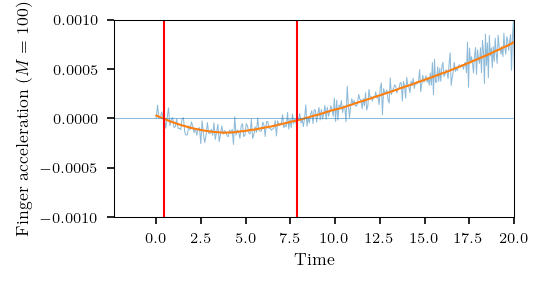

In [33]:
a = 8.6 / 2.51 /2 
fig, ax = plt.subplots(figsize=(2.01*a, 1*a))

acc = np.diff(vel_tot)/np.diff(system.timestamps[:len(vels)])
acc_sm = savgol_filter(acc, 101, 2)
ax.plot(system.timestamps[:len(vels)-1], acc, alpha=0.5, lw=0.5)
ax.plot(system.timestamps[:len(vels)-1], acc_sm)
ax.set_ylim(-0.001,0.001)
ax.set_xlim(right=20)
ax.axhline(0, alpha=0.5, lw=0.5)
ax.axvline(system.timestamps[np.where(acc_sm<0)[0][0]], c="red")
ax.axvline(system.timestamps[np.where(acc_sm[np.where(acc_sm<0)[0][0]:]>0)[0][0]], c="red")
ax.set_ylabel('Finger acceleration ($M=100$)')
ax.set_xlabel('Time')
print("t1", system.timestamps[np.where(acc_sm<0)[0][0]], np.where(acc_sm<0)[0][0])
print("t2", system.timestamps[np.where(acc_sm[np.where(acc_sm<0)[0][0]:]>0)[0][0]], np.where(acc_sm[np.where(acc_sm<0)[0][0]:]>0)[0][0])

### Snapshots

In [118]:
archive_name = 'data/fig6/'

M = 100
M=14.32
input_file = archive_name + 'M{M}'.format(M=M) # 'mobility_ratio{M}'.format(M=M)
if M==14.32:
    t_inds = [0, 807, 1208]
    xlim = [2.5, 10, 10]
else:
    t_inds = [0, 109, 807, 1022]
    xlim = [2.5, 3.5, 10, 10]
system0=System.import_json(input_file=input_file)

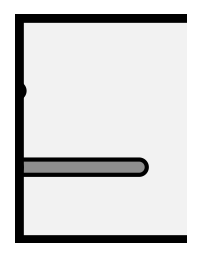

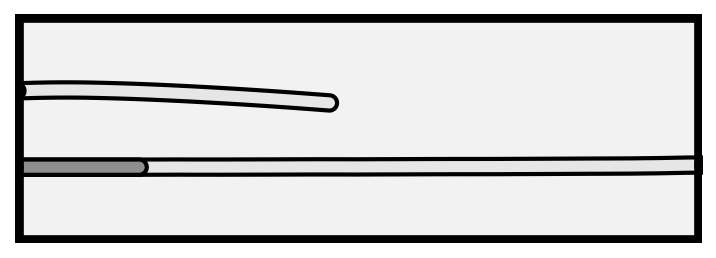

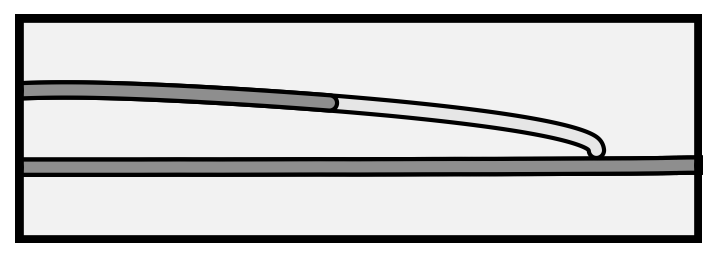

In [119]:
from reticuler.extending_kernels.pde_solvers import rotation_matrix
from reticuler.user_interface import clippers
from shapely.geometry import MultiLineString,Polygon
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.collections import PatchCollection

def plot_polygon(ax, poly, **kwargs):
    """Plot shapely Polygon (or MultiPolygon)"""
    collections = []
    polygons = [poly] if poly.geom_type=="Polygon" else poly.geoms
    for i, poly in enumerate(polygons):
        path = Path.make_compound_path(
            Path(np.asarray(poly.exterior.coords)[:, :2]),
            *[Path(np.asarray(ring.coords)[:, :2]) for ring in poly.interiors])
    
        patch = PathPatch(path) # , **kwargs)
        collections.append(PatchCollection([patch], **kwargs))
        
        ax.add_collection(collections[-1], autolim=True)
        ax.autoscale_view()
    
    return collections

def plot_thick_tree(system, color):
    # PLOT LINES
    pts = [] # list with regularized points (skeleton)
    for branch in system.network.branches:
        line = branch.points
        pts.append(branch.points)

    # thicken tree and find intersection with the box
    tree = MultiLineString(pts)
    thick_tree = tree.buffer(distance=system.extender.pde_solver.finger_width/2, 
                             cap_style=1, join_style=1, resolution=99)
    thick_tree = box.intersection(thick_tree)

    plot_polygon(ax, thick_tree, transform=rot+base, 
                 edgecolor="0", facecolor=color, linewidth=options_tree_plot["linewidth"])    
    

system0=System.import_json(input_file=input_file)
is_thick=1

options_tree_plot = {"color": "0.5", "linewidth": 2}
rot_angle = 90 
rot = transforms.Affine2D().rotate_deg(-rot_angle)
for i in range(len(t_inds)): # np.linspace(0, max_time, int(200/speed_factor)):
    fig = plt.figure(frameon=False)
    ax = plt.Axes(fig, [0., 0., 0.953, 0.318])
    fig.add_axes(ax)
    base = ax.transData

    # PLOT BOX
    box = Polygon(system.network.box.points)
    plot_polygon(ax, box,
                 facecolor="#f2f2f2ff" if is_thick else "#def1ff",
                 transform=rot+base)
    
    if i > 0:
        system = system0.copy()
        clippers.clip_to_step(system, t_inds[i])
        plot_thick_tree(system, color="0.9")
        
        system = system0.copy()
        clippers.clip_to_step(system, t_inds[i-1])
        plot_thick_tree(system, color="#8e8e8eff")
            
    else:
        system = system0.copy()
        clippers.clip_to_step(system, t_inds[i])    
        plot_thick_tree(system, color="#8e8e8eff")
        
    # PLOT BOX
    points_to_plot = system0.network.box.points[system0.network.box.connections]
    for pts in points_to_plot:
        ax.plot(*pts.T, linewidth=options_tree_plot["linewidth"] * 4, color="0", transform=rot+base)  
    
    ax.set_xlim(0, xlim[i])
    ax.set_ylim(-3.3333333, 0)
    ax.axis("off")
    ax.set_aspect("equal")    
    fig.savefig("data/fig6/M{M}_frame{i}.svg".format(M=M, i=i))

## Experiments

### Plots

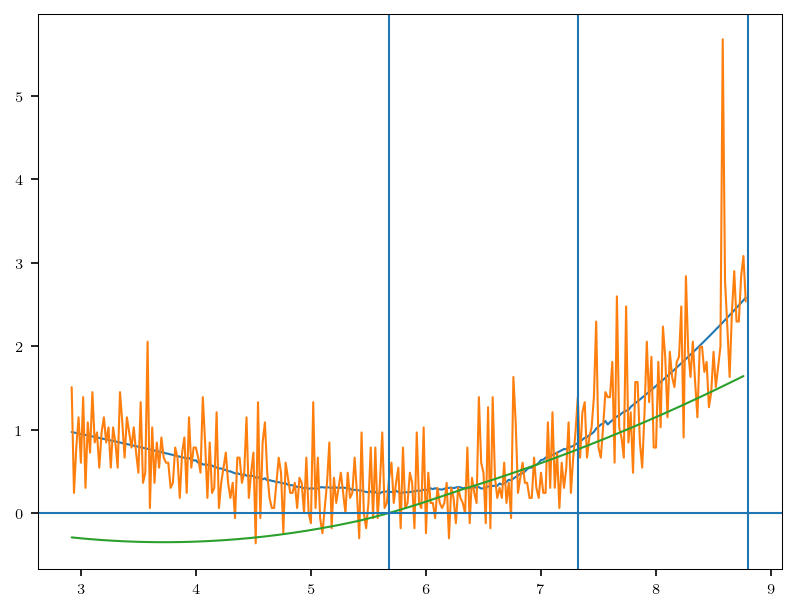

In [135]:
area = np.loadtxt("data/fig6/area_ST.csv")
ind0 = 215
area = area[ind0:510]*0.03476230732934885**2
dt = 0.02
times = (ind0-70 + np.arange(1,len(area)) )*dt # [s]
vel = np.diff(area) / dt
w = savgol_filter(vel, 101, 2)
plt.plot(times,w)
plt.plot(times,vel)
plt.gca().axvline(8.8)

acc = np.diff(w)/0.02
acc_sm = savgol_filter(acc, 251, 2)
plt.plot(times[:-1], acc_sm)
plt.gca().axvline(times[138])
plt.gca().axhline(0)
plt.gca().axvline(times[435-ind0])

vel_exp = [w]
times_exp = [times]

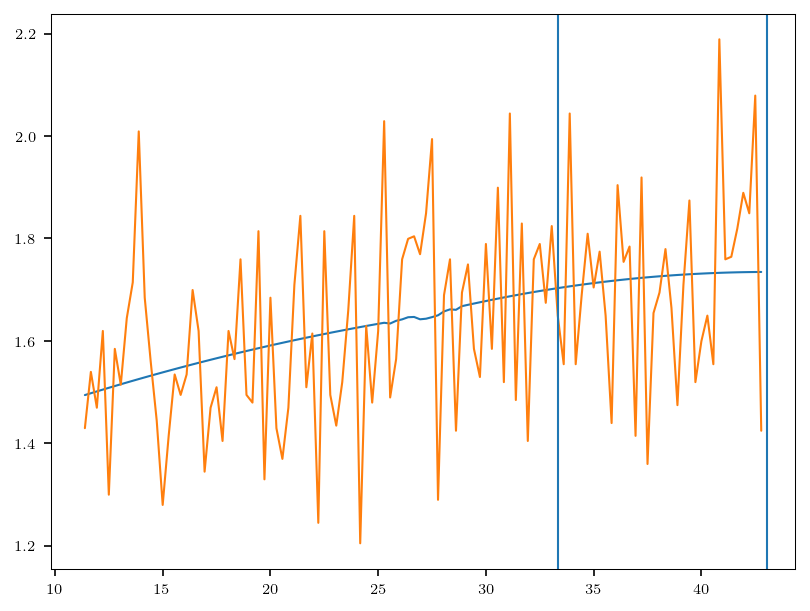

In [136]:
area = np.loadtxt("data/fig6/area_fractures.csv")
ind0 = 40
area = area[ind0:155]*0.0037256937975028346**2
dt = 0.2777777777777778
times = (ind0 + np.arange(1,len(area)) )*dt # [s]
vel = np.diff(area) / dt * 100 # convert from cm^2/h to mm^2/h
w = savgol_filter(vel, 101, 2)
plt.plot(times,w)
plt.plot(times,vel)
plt.gca().axvline(times[119-ind0])
plt.gca().axvline(0.2777777777777778*155)

vel_exp.append(w)
times_exp.append(times)

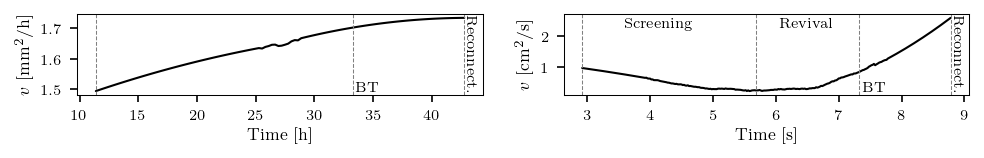

In [138]:
a = 0.5 * 8.6 / 2.51 * 1.0175 # without tip velocity axis
fig, axes = plt.subplots(ncols=2, figsize=(2*2.2*a, 0.4*a))
fig.subplots_adjust(hspace=0.6)

##################################################################
###################### Velocity plot 1 ######################
##################################################################
colormap_colors = matplotlib.colormaps.get_cmap('RdGy_r')
archive_name = 'data/fig6/'
Ms = [100, 14.32]
letter = ['(a)', '(b)', '(c)']
labx = ["$v$ [$\mathrm{cm}^2$/s]" ,"$v$ [$\mathrm{mm}^2$/h]"]
laby = ["Time [s]", "Time [h]"]

for i in [0,1]:
    ax = axes[-(i-1)]
    
    ############## PLOTS ##############
    ax.plot(times_exp[i], vel_exp[i], '-', color='0') # /vel_tot[:,np.newaxis])

    # ax.set_yscale('log')
    # ax.set_ylim(1e-8,5e0)
    ax.set_ylabel(labx[i])
    ax.set_xlabel(laby[i], labelpad=2)

    # ############## VLINES ##############
    t_legends = ['$t_4$','$t_3$','$t_2$']
    if i==0:
        t_inds = [-1, 220, 138,0]
        yy = [2.85, 1.76e-2]
    else:
        t_inds = [-1, 79,0]
    for j, j_t in enumerate(t_inds):
        t = times_exp[i][j_t]
        ax.axvline(t, ls='--', lw=0.5, color='0.5')
        # ax.annotate(t_legends[j], xy=(t, yy[i]), xycoords='data', \
        #             fontfamily='Computer Modern', fontsize=7, color='0', annotation_clip=False)
    ax.annotate('Reconnect.', xy=(0.955, 0.05), xycoords='axes fraction', \
            fontfamily='Computer Modern', fontsize=7, color='0',
           bbox=dict(fc="w",ec="w",pad=-5), rotation=-90)
############## ANNOTATIONS ##############
axes[0].ticklabel_format(axis='y', style='sci', scilimits=(0,0))


axes[1].annotate('Screening', xy=(0.15, 0.84), xycoords='axes fraction', \
            fontfamily='Computer Modern', fontsize=7, color='0')
axes[1].annotate('Revival', xy=(0.53, 0.84), xycoords='axes fraction', \
            fontfamily='Computer Modern', fontsize=7, color='0',
           bbox=dict(fc="w",ec="w",pad=-5))


axes[1].annotate('BT', xy=(0.735, 0.04), xycoords='axes fraction', \
            fontfamily='Computer Modern', fontsize=7, color='0',
             bbox=dict(fc="w",ec="w",pad=-5))
axes[0].annotate('BT', xy=(0.685, 0.04), xycoords='axes fraction', \
            fontfamily='Computer Modern', fontsize=7, color='0',
             bbox=dict(fc="w",ec="w",pad=-5))

fig.align_ylabels()
# axes[1].set_title('Saffman-Taylor', fontsize=10, pad=10)
# axes[0].set_title('Fracture dissolution', fontsize=10, pad=10)
fig.savefig('data/fig6/fig6_plots_exp.pdf', bbox_inches='tight')

# Supplementary Information: animations

# Simulations with field around

In [302]:
import scipy
import textwrap
import subprocess
import matplotlib.tri as tri

from reticuler.extending_kernels.pde_solvers import FreeFEM
from reticuler.user_interface import clippers

def import_results(file_name):
    points = np.loadtxt(file_name+'.points', skiprows=1, usecols=[0, 1])
    labels_points = np.loadtxt(file_name+'.points', skiprows=1, usecols=[3], dtype='int')
    triangles_id = np.loadtxt(file_name+'.faces', skiprows=1, usecols=[1,2,3], dtype='int')-1
    labels_triangles = np.loadtxt(file_name+'.faces', skiprows=1, usecols=[7], dtype='int')
    field = np.loadtxt(file_name+'.fields', usecols=2)
    
    return points, labels_points, triangles_id, labels_triangles, field

In [312]:
archive_name = 'data/SI_animations/'

M = 14.32
exp_name = 'M{M}'.format(M=M) # 'mobility_ratio{M}'.format(M=M)
input_file = archive_name + exp_name
system0 = System.import_json(input_file=input_file)

## Calculate field

In [277]:
from tqdm import tqdm

### CALCULATE FIELD AROUND FOR EACH TIMESTEP ###

speed_factor = 0.5
max_time = system0.growth_gauges[3]
# for i in tqdm(range(int(system0.growth_gauges[0])+2), desc = 'tqdm() Progress Bar'):
for i in tqdm(np.linspace(0, max_time, int(200/speed_factor)), desc = 'tqdm() Progress Bar'):
    system = system0.copy()
    clippers.clip_to_time(system, i)
    # clippers.clip_to_step(system, i)
    
    file_name =  archive_name+exp_name+"/results{step:g}".format(M=M,step=system.growth_gauges[0])
    script = system.extender.pde_solver.prepare_script(system.network)
    script = script + textwrap.dedent(
                """
                // Exporting data
                savemesh(Th,"{file_name}",[x,y]);
                ofstream file("{file_name}.fields");
                for (int i = 0; i < Th.nv; i++)
                    {{
                    x = Th(i).x;
                    y = Th(i).y;
                    file << x << " " << y << " ";
                    file << u << " ";
                    file << endl;
                    }}""".format(file_name=file_name))
    
    script = script.replace("nvOnTips.min < 70 || ", "")
    script = script.replace("[u, 0.01*tipfield(X,Y,nbTips,tipR)]", "1")
    script = script.replace(",iso=1,ratio=1.8,", ",iso=1,ratio=1.8,hmax=5e-2,")
    
    script_name = archive_name+exp_name+"/script.edp"
    with open(script_name, "w") as edp_temp_file:
        edp_temp_file.write(script)

    cmd = [
        "FreeFem++",
        "-nw",
        "-nc",
        "-v",
        "0",
        "-f",
        "{file_name}".format(file_name=edp_temp_file.name),
    ]
    result = subprocess.run(
        args=cmd,
        stdin=subprocess.PIPE,
        stdout=subprocess.PIPE,
        stderr=subprocess.PIPE,
    )

tqdm() Progress Bar: 100%|███████████████████████████████████████████████████████████| 150/150 [05:21<00:00,  2.14s/it]


## Animate

tqdm() Progress Bar: 100%|███████████████████████████████████████████████████████████| 400/400 [03:04<00:00,  2.16it/s]


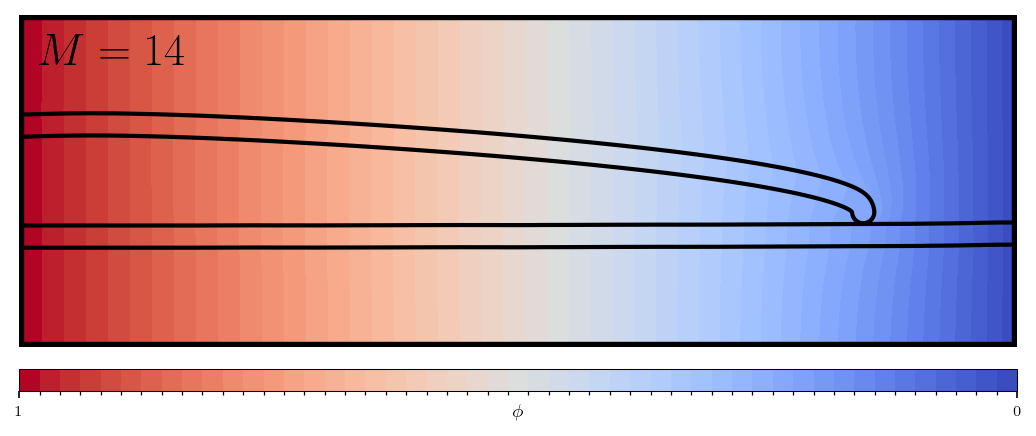

In [313]:
lvls = np.linspace(0, 1, 50)
norm = matplotlib.colors.BoundaryNorm(boundaries=lvls, ncolors=256)
colormap = 'coolwarm'

options_tree_plot = {"color": "0", "linewidth": 2.5}
rot_angle = 90 
max_time = system0.growth_gauges[3]
speed_factor = 0.5

a = 1
fig = plt.figure(frameon=False, figsize=(a*17.8*cm2inch, 7.5*cm2inch))# a*17.8*cm2inch/10*(3+1/3)
ax = plt.Axes(fig, [0.025, 0.1, 0.95, 0.95])
fig.add_axes(ax)

base = ax.transData
rot = transforms.Affine2D().rotate_deg(-rot_angle)

# PLOT BOX
box = Polygon(system0.network.box.points)
points_to_plot = system0.network.box.points[system0.network.box.connections]
for pts in points_to_plot:
    ax.plot(*pts.T, linewidth=options_tree_plot["linewidth"] * 2, color="0", transform=rot+base)

artists = []
for i in tqdm(np.linspace(0, max_time, int(200/speed_factor)), desc = 'tqdm() Progress Bar'):
    system = system0.copy()
    clippers.clip_to_time(system, i)
    
    # PLOT FIELD
    file_name = archive_name+exp_name+"/results{step:g}".format(M=M,step=system.growth_gauges[0])
    points, labels_points, triangles_id, \
        labels_triangles, field = import_results(file_name=file_name)
    triang = tri.Triangulation(points[:,0], points[:,1], triangles_id)
    tcf = ax.tricontourf(triang, field, transform=rot+base, cmap=colormap, levels=lvls, norm=norm);
    
    # PLOT LINES
    etwas = [] # for tree buffer
    for branch in system.network.branches:
        line = branch.points
        etwas.append(branch.points)
    tree = MultiLineString(etwas)
    thick_tree = tree.buffer(distance=system.extender.pde_solver.finger_width/2, 
                             cap_style=1, join_style=1, resolution=99)
    thick_tree = box.intersection(thick_tree)
    ll = plot_polygon(ax, thick_tree, transform=rot+base, 
                 edgecolor="0", facecolor="none", lw=2)    

    artists.append(ll+list(tcf.collections))
    
ax.annotate('$M={}$'.format(int(M)), xy=(0.02, 0.85), xycoords='axes fraction', \
            fontfamily='Computer Modern', fontsize=22, color='0') 
ax.set_xlim(0, 10)
ax.set_ylim(-3.33333, 0)
ax.axis("off")
ax.set_aspect("equal")

####### Colorbar #######
cax = plt.axes([0.025, 0.1, 0.95, 0.05])
cbar = fig.colorbar(tcf, cax=cax, orientation='horizontal', aspect=50, shrink=0.6 )
cbar.ax.set_xticks([0,1])
cbar.set_label(r'$\phi$', fontsize=9, labelpad=-7)
cbar.ax.invert_xaxis() 

ani = animation.ArtistAnimation(fig=fig, artists=artists, interval=20, blit=True)
ani.save(archive_name + exp_name + ".avi", writer="ffmpeg", dpi=500)

# Experiments

In [3]:
import cv2
from matplotlib.animation import FuncAnimation

In [237]:
base_name = 'C:/Google/Biblioteczka/zWritings/2022/Reconnections after breakthrough/figs/examples/'
archive_name = base_name + 'fractures/processed/'
imgs = [cv2.cvtColor(cv2.imread(archive_name+"img{:04d}.png".format(n)), cv2.COLOR_BGR2GRAY) for n in range(1,265)]

In [246]:
print("1 frame is {} h.".format(1000/3600))

print("1 cm is {} pixels.".format(937 / (140.414/40.222)))
print("1 px is {} cm.".format(1/268.40638397880554))

1 frame is 0.2777777777777778 h.
1 cm is 268.40638397880554 pixels.
1 px is 0.0037256937975028346 cm.


In [242]:
imgs[0].shape

(887, 937)

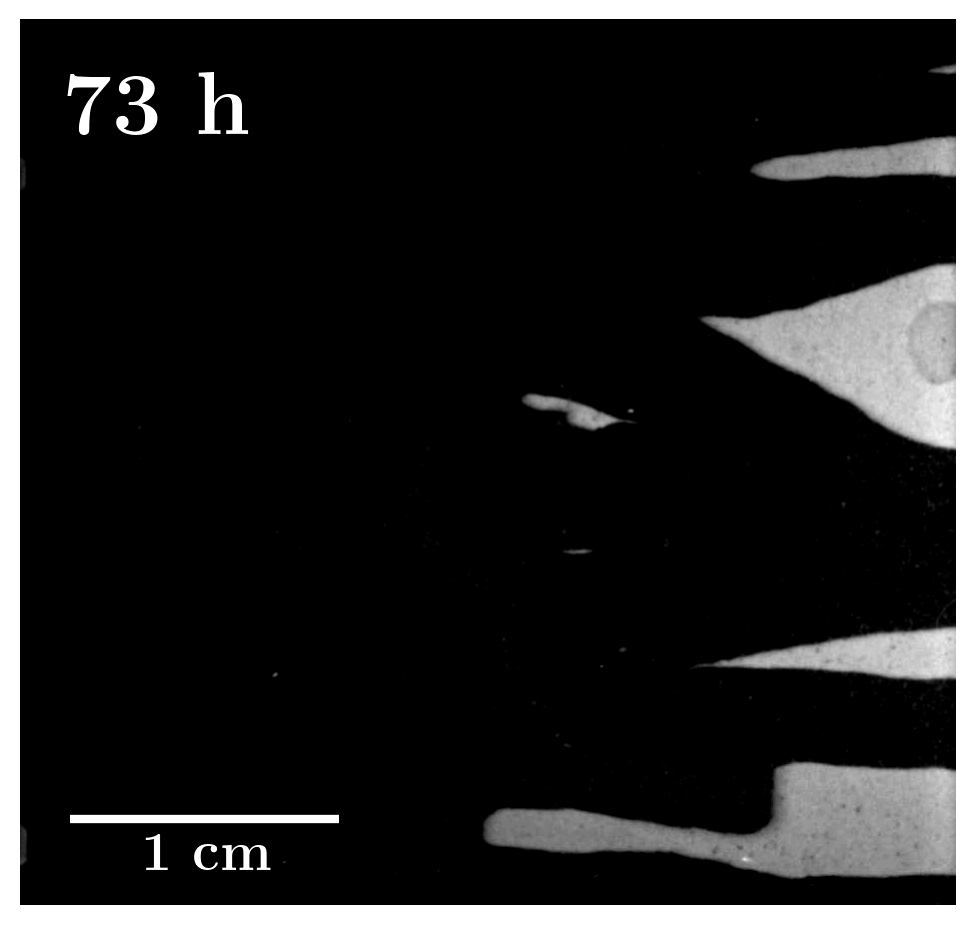

In [267]:
def update_img(n):
    # print(n)
    t.set_text(r'\textbf{{ {:02d} h }}'.format(int(n*1000/3600)))
    pic.set_array(imgs[n])
    return pic, t

my_dpi=200
fig = plt.figure(frameon=False, dpi=my_dpi)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.axis("off")
fig.add_axes(ax)
fig.set_size_inches(937/my_dpi, 887/my_dpi)


pic = ax.imshow(imgs[0], cmap="gray")
t = ax.annotate(r'\textbf{{ {:02d} h }}'.format(1), xy=(0.05, 0.87), xycoords='axes fraction', \
            fontfamily='Computer Modern', fontsize=32, color='1')

ax.plot([50, 50+268.40638397880554],[800,800], lw=3,c="w",solid_capstyle="butt")
ax.text(125, 850, r'\textbf{{1 cm}}', animated=True,\
            fontfamily='Computer Modern', fontsize=20, color='1') 

ani = FuncAnimation(fig, update_img, frames=264, interval=30, blit=True)
ani.save(archive_name + "exp_fractures.avi", writer="ffmpeg", dpi=my_dpi)

In [69]:
base_name = 'C:/Google/Biblioteczka/zWritings/2022/Reconnections after breakthrough/figs/examples/'
archive_name = base_name + 'saffman-taylor/video/DSC_0470_2/'
imgs = [cv2.cvtColor(cv2.imread(archive_name+"img{}.png".format(n)), cv2.COLOR_BGR2GRAY) for n in range(70,650,3)]

In [70]:
print((270-70)*13/650)
print((435-70)*13/650)
print((515-70)*13/650)
print((600-70)*13/650)
print("1 frame is {} s.".format(13/650))

print("1 cm is {} pixels.".format(272 / (70.726/14.96*2)))
print("1 px is {} cm.".format(1/28.766790147894692))

4.0
7.3
8.9
10.6
1 frame is 0.02 s.
1 cm is 28.766790147894692 pixels.
1 px is 0.03476230732934885 cm.


Wall time: 21.6 s


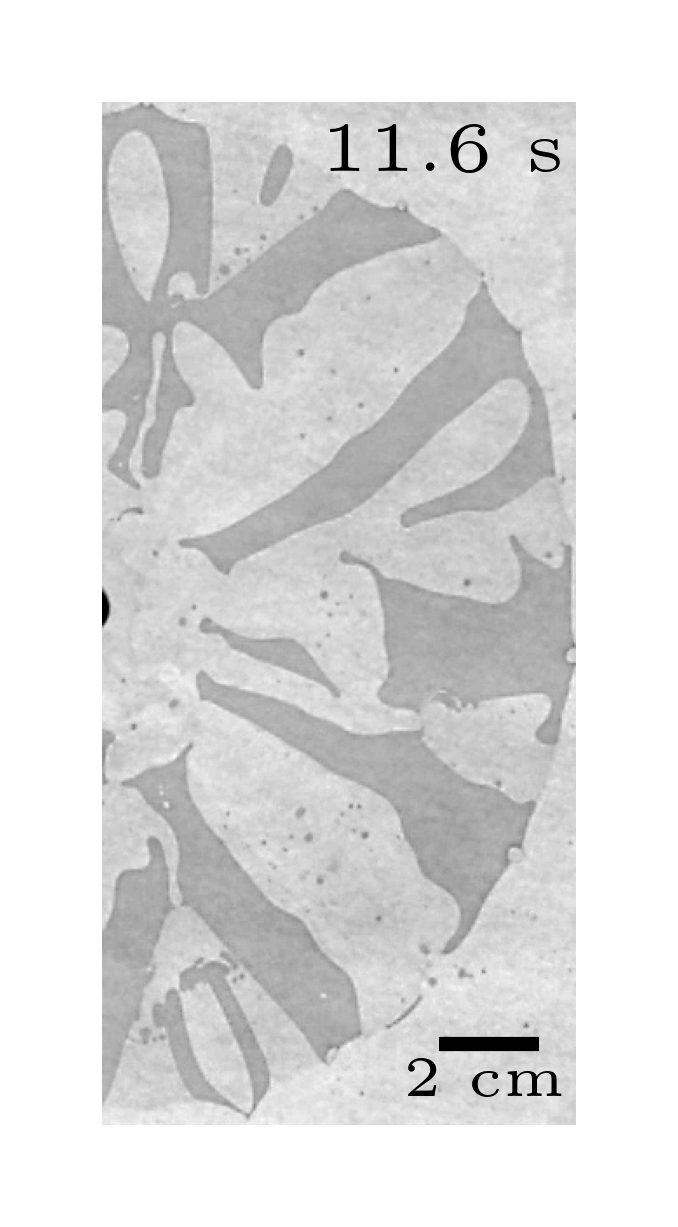

In [228]:
%%time

def update_img(n):
    # print(n)
    pic.set_array(imgs[n])
    t.set_text('{:0.1f} s'.format(3*13/650*n))
    return pic, t

my_dpi=1024
fig = plt.figure(frameon=False, dpi=my_dpi)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.axis("off")
fig.add_axes(ax)
fig.set_size_inches(2.72/5.87, 1)
ax.set_aspect(1)

pic = ax.imshow(imgs[0], cmap="gray")
# t = ax.text(150, 45, "", animated=True,\
#             fontfamily='Computer Modern', fontsize=5, color='0') # 575
t = ax.text(130, 40, "12.6 s", animated=True,\
            fontfamily='Computer Modern', fontsize=5, color='0') # 575
ax.plot([250-28.766790147894692*2,250],[540,540], c="k",solid_capstyle="butt")
ax.text(175, 570, "2 cm", animated=True,\
            fontfamily='Computer Modern', fontsize=4, color='0') 

# pic.set_array(imgs[-1])
# len(imgs)
ani = FuncAnimation(fig, update_img, frames=len(imgs), interval=60, blit=True)
ani.save(archive_name + "exp_saffman.avi", writer="ffmpeg", dpi=my_dpi)